In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('deliveries.csv')
data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [5]:
data.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [7]:
data.shape

(260920, 17)

In [9]:
data_match=pd.read_csv('matches.csv')
data_match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [11]:
data_match.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [13]:
data_match.shape

(1095, 20)

In [15]:
data_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [19]:
data_match.duplicated().sum()

0

In [21]:
data.duplicated().sum()

0

In [23]:
data_match.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [25]:
data_match[data_match['city'].isna()]['venue'].unique()

array(['Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

In [27]:
#Data Preprocessing

In [29]:
data_match.loc[(data_match['city'].isna()) & (data_match['venue'] == 'Sharjah Cricket Stadium'), 'city'] = 'Sharjah'
data_match.loc[(data_match['city'].isna()) & (data_match['venue'] == 'Dubai International Cricket Stadium'), 'city'] = 'Dubai'
data_match['city'].isnull().sum()

0

In [31]:
data_match['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [33]:
data_match.replace({"season":{"2007/08":"2008","2009/10":"2010","2020/21":"2020"}},inplace=True)

In [35]:
data_match['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

In [37]:
venue_replace_dict = {'Arun Jaitley Stadium' : 'Arun Jaitley Stadium, Delhi',
'Feroz Shah Kotla' : 'Arun Jaitley Stadium, Delhi',
'Brabourne Stadium' : 'Brabourne Stadium, Mumbai',
'Dr DY Patil Sports Academy' : 'Dr DY Patil Sports Academy, Mumbai',
'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium' : 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
'Eden Gardens' : 'Eden Gardens, Kolkata',
'Himachal Pradesh Cricket Association Stadium' : 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
'M Chinnaswamy Stadium' : 'M Chinnaswamy Stadium, Bengaluru',
'M.Chinnaswamy Stadium' : 'M Chinnaswamy Stadium, Bengaluru',
'MA Chidambaram Stadium' : 'MA Chidambaram Stadium, Chepauk, Chennai',
'MA Chidambaram Stadium, Chepauk' : 'MA Chidambaram Stadium, Chepauk, Chennai','Maharashtra Cricket Association Stadium' : 'Maharashtra Cricket Association Stadium, Pune',
'Sardar Patel Stadium, Motera' : 'Narendra Modi Stadium, Ahmedabad',
'Punjab Cricket Association IS Bindra Stadium' : 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
'Punjab Cricket Association IS Bindra Stadium, Mohali' : 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
'Punjab Cricket Association Stadium, Mohali' : 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
'Rajiv Gandhi International Stadium' : 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
'Rajiv Gandhi International Stadium, Uppal' : 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
'Sawai Mansingh Stadium' : 'Sawai Mansingh Stadium, Jaipur',
'Wankhede Stadium' : 'Wankhede Stadium, Mumbai'
}
data_match.replace({"venue":venue_replace_dict},inplace=True)

In [39]:
#Trend of Total Matches Over Seasons
data_match['season'].value_counts().to_frame().T

season,2013,2023,2012,2022,2011,2024,2018,2021,2020,2019,2016,2014,2010,2017,2015,2008,2009
count,76,74,74,74,73,71,60,60,60,60,60,60,60,59,59,58,57


In [41]:
data_match.pivot_table(index='season', columns='winner', aggfunc='size', fill_value=0)

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,,,,,
2008,9,2,0,7,0,0,10,0,6,0,7,0,0,13,0,0,4,0,0
2009,8,9,0,10,0,0,7,0,3,0,5,0,0,6,0,0,9,0,0
2010,9,8,0,7,0,0,4,0,7,0,11,0,0,6,0,0,8,0,0
2011,11,6,0,4,0,0,7,6,8,0,10,4,0,6,0,0,10,0,0
2012,10,4,0,11,0,0,8,0,12,0,10,4,0,7,0,0,8,0,0
2013,12,0,0,3,0,0,8,0,6,0,13,4,0,11,0,0,9,0,10
2014,10,0,0,2,0,0,12,0,11,0,7,0,0,7,0,0,5,0,6
2015,10,0,0,5,0,0,3,0,7,0,10,0,0,7,0,0,8,0,7
2016,0,0,0,7,9,0,4,0,8,0,7,0,0,0,0,5,9,0,11


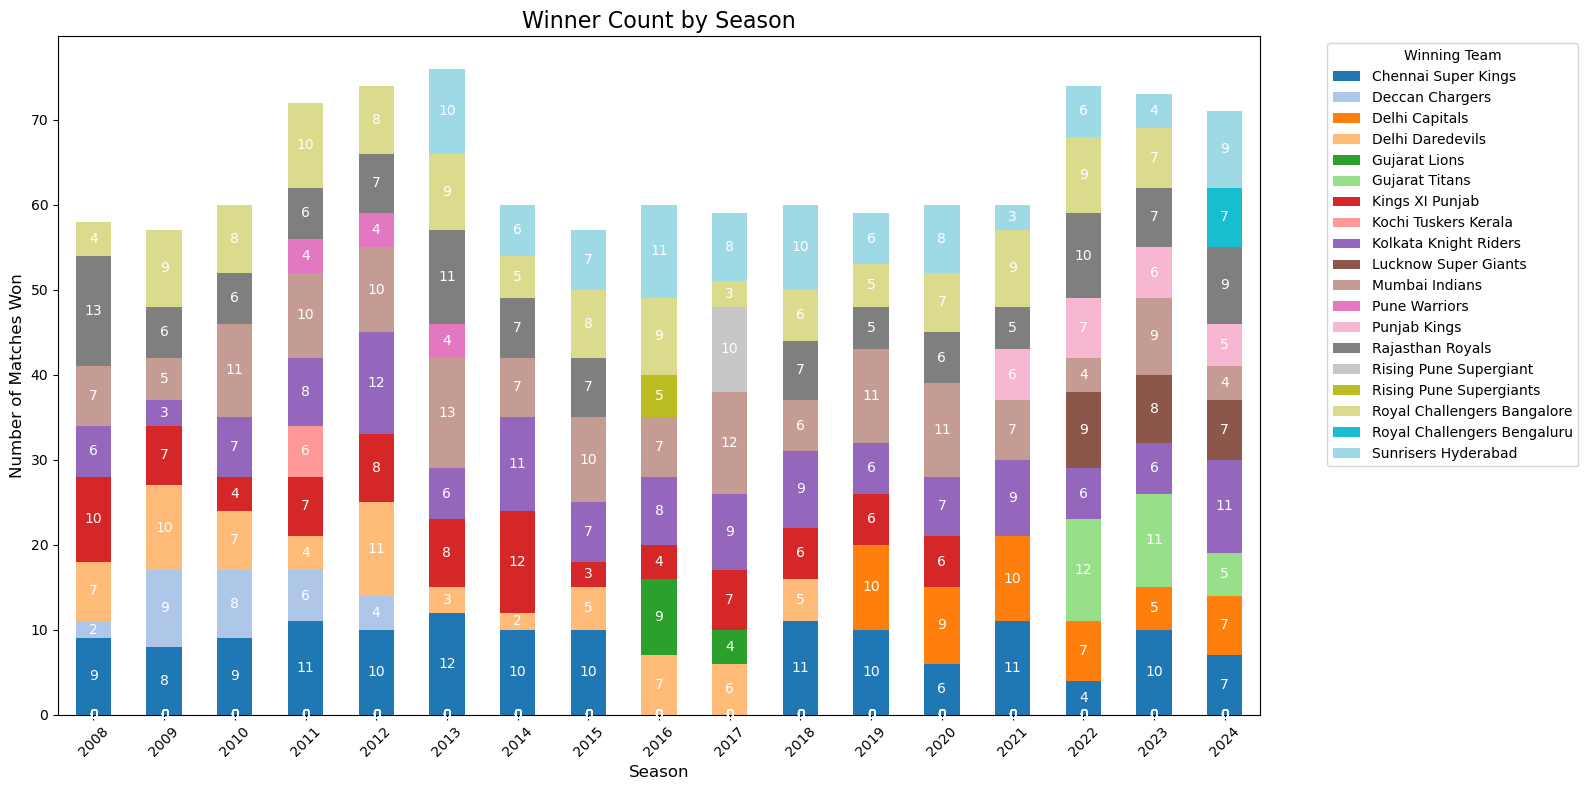

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by season and winner to count the number of wins
season_winners_bar = data_match.groupby(['season', 'winner']).size().unstack(fill_value=0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(16, 8))
season_winners_bar.plot(kind='bar', stacked=True, colormap='tab20', ax=ax)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='white')

# Titles and labels
plt.title("Winner Count by Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Matches Won", fontsize=12)
plt.xticks(rotation=45)  # Rotate season labels to avoid overlap
plt.legend(title="Winning Team", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()  # Adjust layout to fit everything


C:\Users\91755\AppData\Local\Temp\ipykernel_22560\3521434660.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_200plus_counts['Team'], y=team_200plus_counts['200+ Scores'], palette='magma')


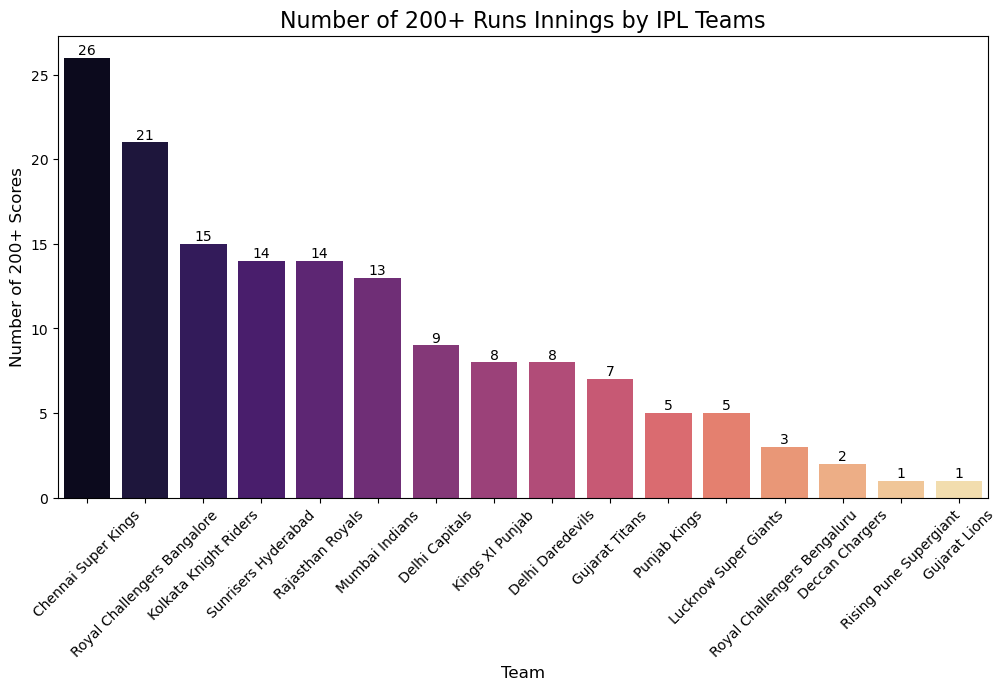

In [45]:
# Filter innings where a team scored 200+ runs
high_scores = data_match[data_match['target_runs'] >= 200]

# Count occurrences of 200+ scores per team
team_200plus_counts = high_scores['team1'].value_counts().reset_index()
team_200plus_counts.columns = ['Team', '200+ Scores']

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=team_200plus_counts['Team'], y=team_200plus_counts['200+ Scores'], palette='magma')

# Add labels
plt.xlabel("Team", fontsize=12)
plt.ylabel("Number of 200+ Scores", fontsize=12)
plt.title("Number of 200+ Runs Innings by IPL Teams", fontsize=16)
plt.xticks(rotation=45)  # Rotate team names for better visibility

# Show values on bars
for index, value in enumerate(team_200plus_counts['200+ Scores']):
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=10)

plt.show()



In [49]:
data.columns = data.columns.str.strip()
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

C:\Users\91755\AppData\Local\Temp\ipykernel_22560\3845317449.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batter', data=top_scorers, palette='viridis')


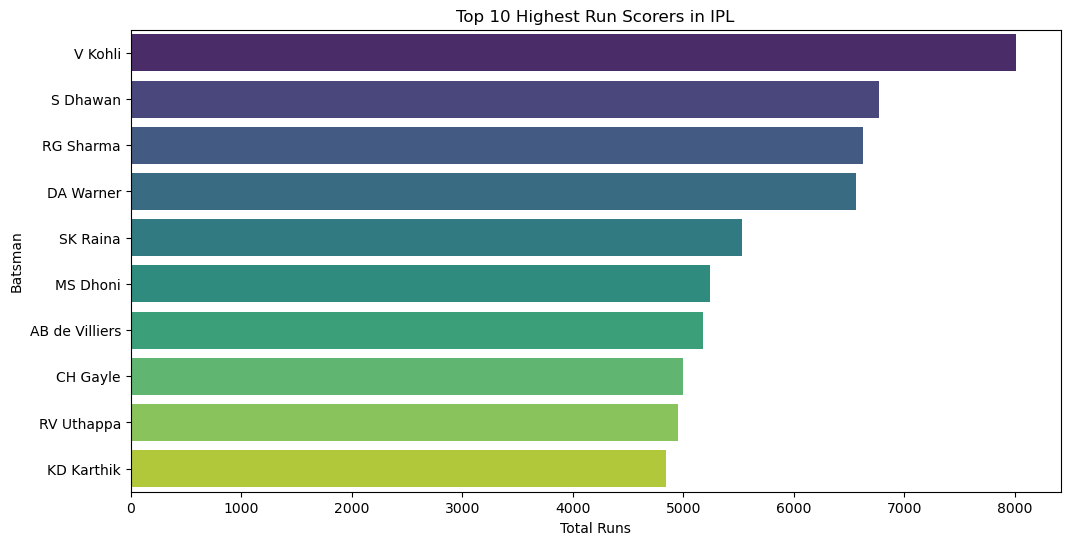

In [51]:
# Group by batter and sum up the runs
top_scorers = data.groupby('batter')['batsman_runs'].sum().reset_index()

# Sort by total runs and get the top 10
top_scorers = top_scorers.sort_values(by='batsman_runs', ascending=False).head(10)

# Plot the top scorers
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batter', data=top_scorers, palette='viridis')
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.title("Top 10 Highest Run Scorers in IPL")
plt.show()

C:\Users\91755\AppData\Local\Temp\ipykernel_22560\3924264095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='wickets', y='bowler', data=top_wicket_takers, palette='magma')


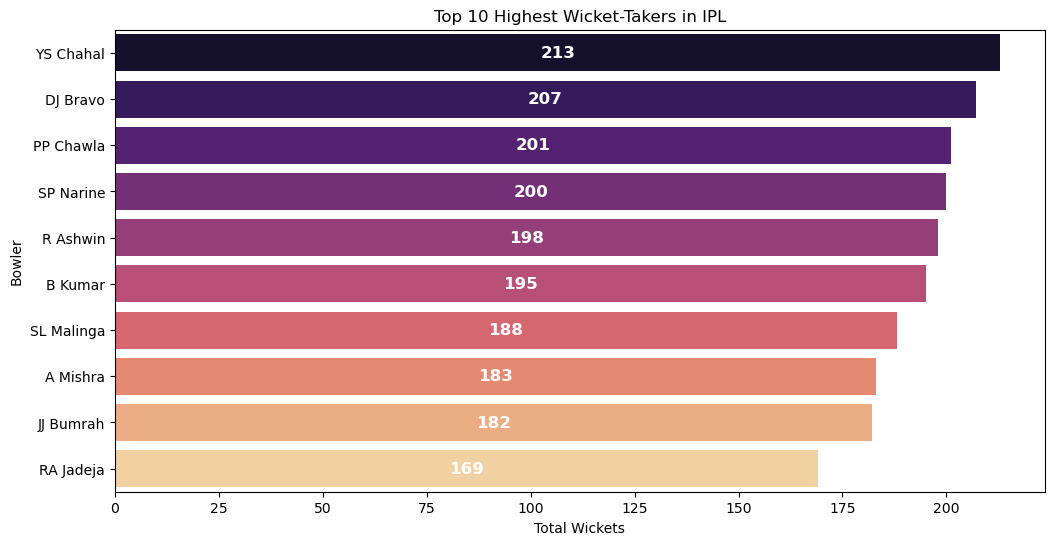

In [53]:
# Filter only valid wicket-taking deliveries
wicket_data = data[data['is_wicket'] == 1]

# Count wickets taken by each bowler
top_wicket_takers = wicket_data.groupby('bowler').size().reset_index(name='wickets')

# Sort by highest wickets and get top 10
top_wicket_takers = top_wicket_takers.sort_values(by='wickets', ascending=False).head(10)

# Plot the top 10 wicket-takers
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='wickets', y='bowler', data=top_wicket_takers, palette='magma')
# Add labels inside bars (in the middle)
for index, value in enumerate(top_wicket_takers['wickets']):
    ax.text(value / 2, index, f"{value}", ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Add labels and title
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.title("Top 10 Highest Wicket-Takers in IPL")

plt.show()

C:\Users\91755\AppData\Local\Temp\ipykernel_22560\769284139.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='strike_rate', y='batter', data=top_strike_rates, palette='magma')


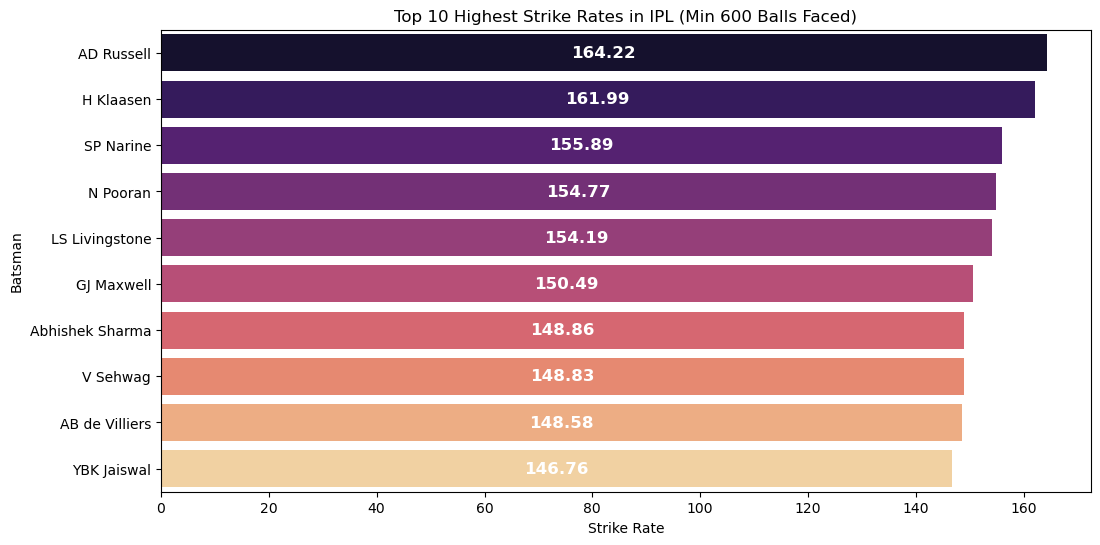

In [55]:
# Group by batter and calculate total runs and total balls faced
batting_stats = data.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'}).reset_index()

# Calculate Strike Rate (SR)
batting_stats['strike_rate'] = (batting_stats['batsman_runs'] / batting_stats['ball']) * 100

# Filter players who have faced at least 600 balls
batting_stats = batting_stats[batting_stats['ball'] >= 600]

# Sort by highest strike rate and take top 10
top_strike_rates = batting_stats.sort_values(by='strike_rate', ascending=False).head(10)
# Plot the top 10 strike rates
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='strike_rate', y='batter', data=top_strike_rates, palette='magma')

# Add labels inside bars (centered)
for index, value in enumerate(top_strike_rates['strike_rate']):
    ax.text(value / 2, index, f"{value:.2f}", ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Labels and title
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.title("Top 10 Highest Strike Rates in IPL (Min 600 Balls Faced)")
plt.show()

Text(0, 0.5, 'Toss Winner')

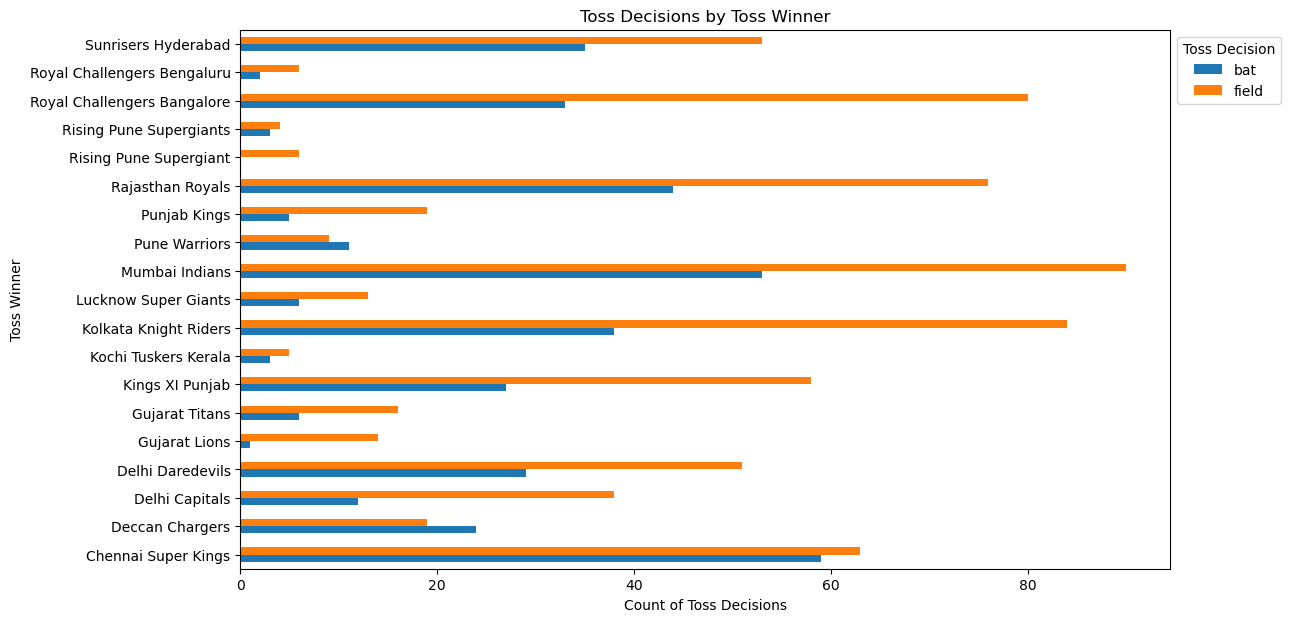

In [57]:
toss_decision = data_match.pivot_table(index='toss_winner', columns='toss_decision', aggfunc='size', fill_value=0)
toss_decision.plot(kind='barh', figsize = (12,7), title="Toss Decisions by Toss Winner")
plt.legend(title='Toss Decision', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Count of Toss Decisions')
plt.ylabel('Toss Winner')

  toss_decision  wins  percentage
0           bat   390   35.779817
1         field   700   64.220183


C:\Users\91755\AppData\Local\Temp\ipykernel_22560\21323290.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wins_by_decision, x='toss_decision', y='percentage', palette='Set2')


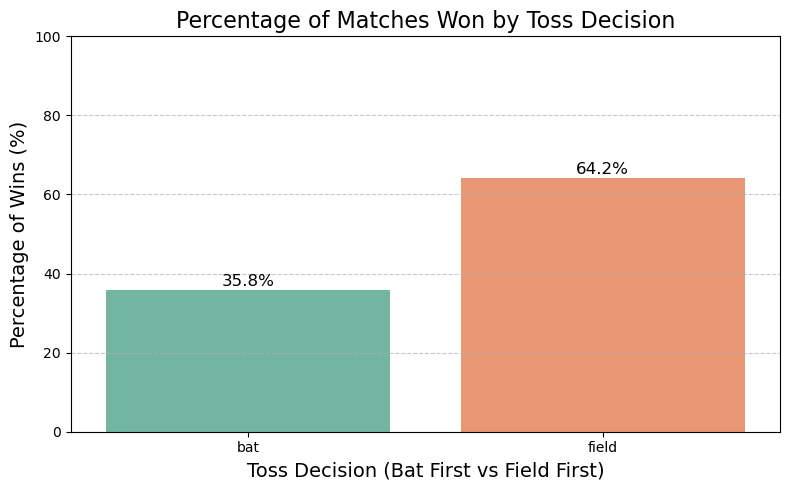

In [59]:
# Removing rows where the winner is missing
df_clean = data_match.dropna(subset=['winner'])

# Grouping by toss decision and counting how often each decision leads to a win
wins_by_decision = df_clean.groupby('toss_decision').size().reset_index(name='wins')

# Calculating the percentage of matches won by teams batting first vs. fielding first
total_matches = df_clean.shape[0]
wins_by_decision['percentage'] = (wins_by_decision['wins'] / total_matches) * 100

# Displaying the result
print(wins_by_decision)

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(data=wins_by_decision, x='toss_decision', y='percentage', palette='Set2')

# Adding titles and labels
plt.title('Percentage of Matches Won by Toss Decision', fontsize=16)
plt.xlabel('Toss Decision (Bat First vs Field First)', fontsize=14)
plt.ylabel('Percentage of Wins (%)', fontsize=14)

# Adding values on top of the bars
for index, row in wins_by_decision.iterrows():
    plt.text(index, row['percentage'] + 1, f'{row["percentage"]:.1f}%', 
             ha='center', fontsize=12)
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  
plt.show()

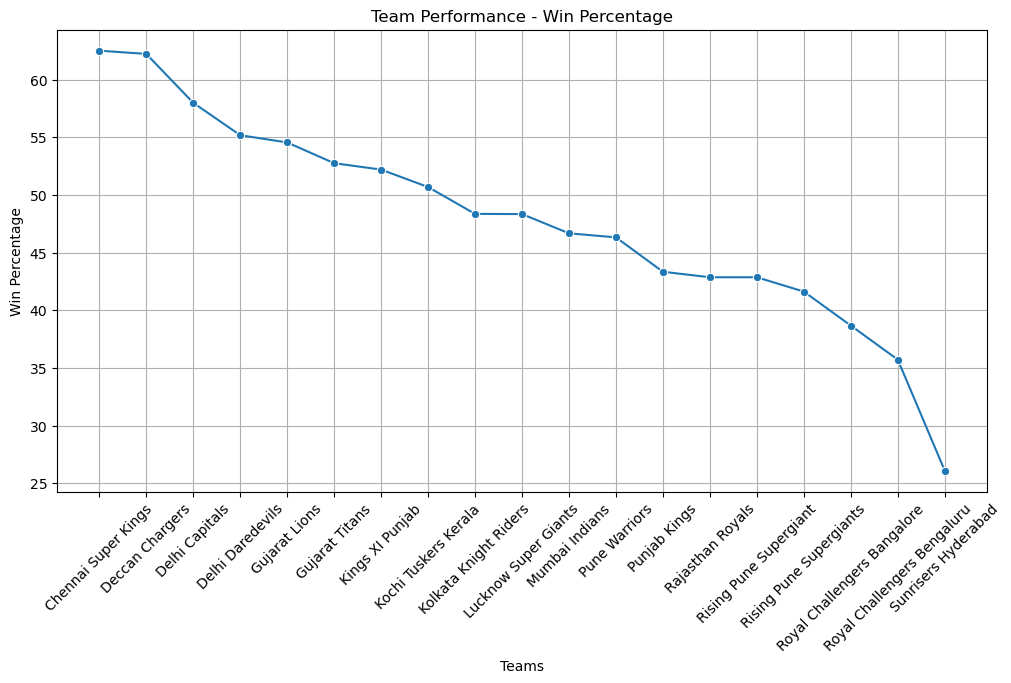

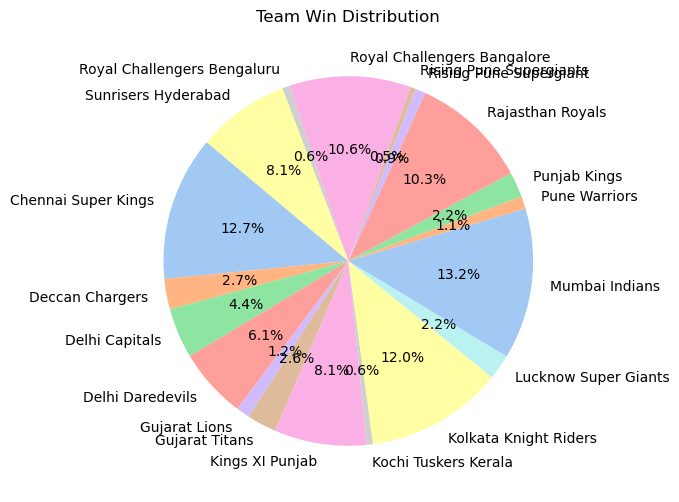

In [61]:
# Count matches played per team (team1 & team2 appear in matches)
matches_played = pd.concat([data_match['team1'], data_match['team2']]).value_counts()

# Count matches won per team
matches_won = data_match['winner'].value_counts()

# Calculate win percentage
team_performance = pd.DataFrame({'Matches Played': matches_played, 'Matches Won': matches_won})
team_performance['Win Percentage'] = (team_performance['Matches Won'] / team_performance['Matches Played']) * 100
team_performance = team_performance.fillna(0)  # Fill NaN values for teams that never won

# --- LINE CHART: Win Percentage Over Time ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_performance.sort_values(by='Win Percentage', ascending=False), x=team_performance.index, y='Win Percentage', marker='o')
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Win Percentage")
plt.title("Team Performance - Win Percentage")
plt.grid()
plt.show()

# --- PIE CHART: Win Distribution ---
plt.figure(figsize=(10, 6))
plt.pie(team_performance['Matches Won'], labels=team_performance.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Team Win Distribution")
plt.show()

C:\Users\91755\AppData\Local\Temp\ipykernel_22560\1114993013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')


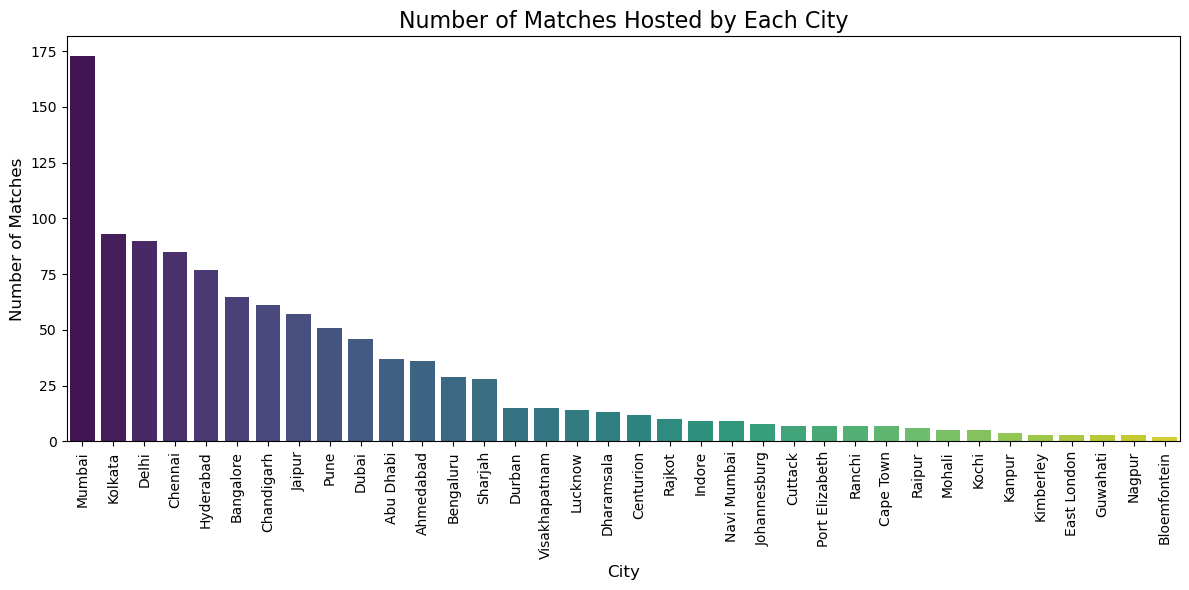

In [63]:
# Replace NaN values in 'city' column with 'Unknown' and count the occurrences
city_counts = data_match['city'].replace(np.NaN, 'Unknown').value_counts()

# Creating a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')

for index, value in enumerate(city_counts.values):
    ax.text(index, value + 2, str(value), ha='center', fontsize=10, fontweight='bold')


# Add titles and labels
plt.title('Number of Matches Hosted by Each City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

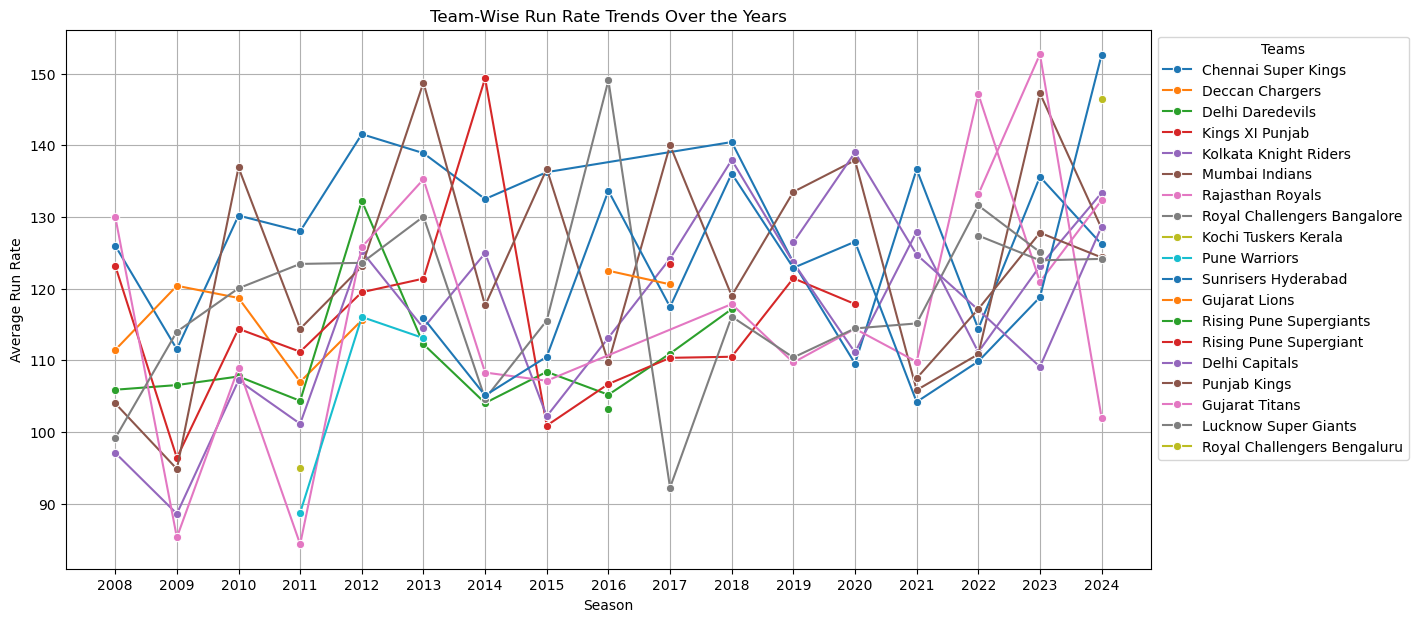

In [65]:
# Merge deliveries and matches dataset to get season info
df_merged = data.merge(data_match[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Calculate runs per over for each team per season
team_run_rate = df_merged.groupby(['season', 'batting_team'])['total_runs'].sum() / df_merged.groupby(['season', 'batting_team'])['over'].nunique()
team_run_rate = team_run_rate.reset_index(name='run_rate')

# Plot team run rates over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=team_run_rate, x='season', y='run_rate', hue='batting_team', marker='o', palette='tab10')
plt.xlabel("Season")
plt.ylabel("Average Run Rate")
plt.title("Team-Wise Run Rate Trends Over the Years")
plt.grid()
plt.legend(title="Teams", bbox_to_anchor=(1, 1))
plt.show()

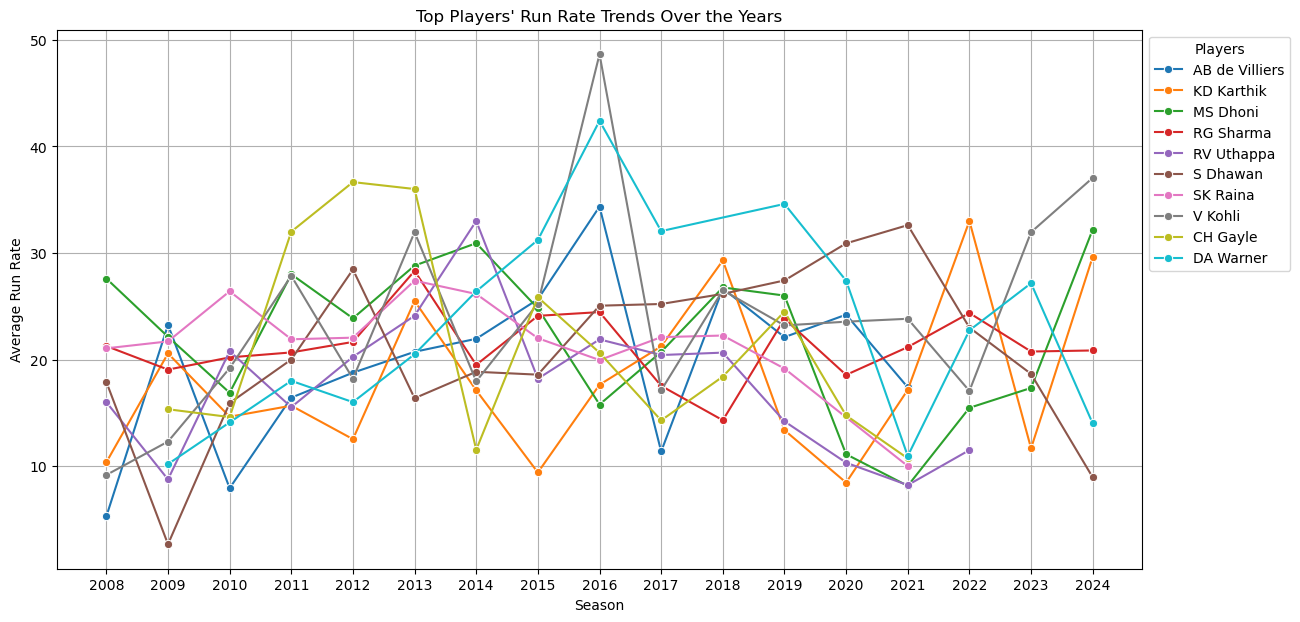

In [67]:
# Calculate runs per over for each player per season
player_run_rate = df_merged.groupby(['season', 'batter'])['batsman_runs'].sum() / df_merged.groupby(['season', 'batter'])['over'].nunique()
player_run_rate = player_run_rate.reset_index(name='run_rate')

# Filter for top players based on highest total runs
top_players = df_merged.groupby('batter')['batsman_runs'].sum().nlargest(10).index
player_run_rate = player_run_rate[player_run_rate['batter'].isin(top_players)]

# Plot individual player scoring trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=player_run_rate, x='season', y='run_rate', hue='batter', marker='o', palette='tab10')
plt.xlabel("Season")
plt.ylabel("Average Run Rate")
plt.title("Top Players' Run Rate Trends Over the Years")
plt.grid()
plt.legend(title="Players", bbox_to_anchor=(1, 1))
plt.show()

C:\Users\91755\AppData\Local\Temp\ipykernel_22560\2050443792.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=partnership_runs['batsman_runs'], y=partnership_runs['batting_pair'], palette='magma')


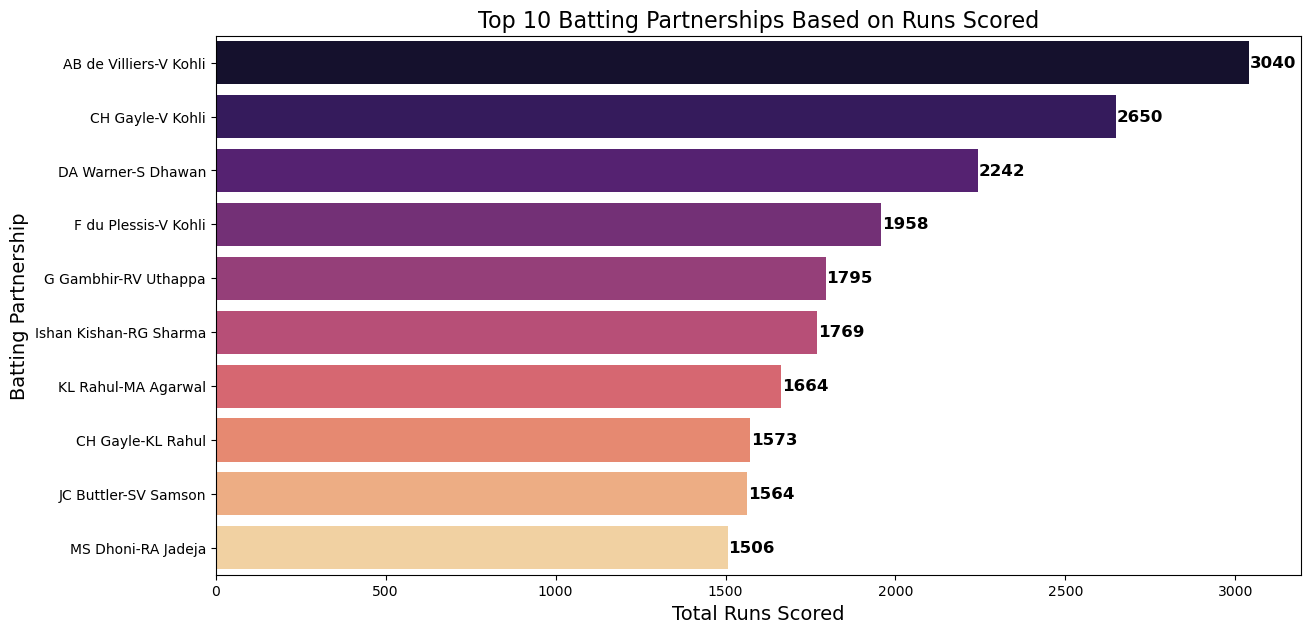

In [69]:
# Create a unique batting pair column (sorted so that order doesn't matter)
data['batting_pair'] = data.apply(lambda x: '-'.join(sorted([x['batter'], x['non_striker']])), axis=1)

# Aggregate runs scored by each batting pair
partnership_runs = data.groupby('batting_pair')['batsman_runs'].sum().reset_index()
partnership_runs = partnership_runs.sort_values(by='batsman_runs', ascending=False).head(10)

# Plot histogram for top partnerships
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=partnership_runs['batsman_runs'], y=partnership_runs['batting_pair'], palette='magma')

# Add labels to each bar
for index, value in enumerate(partnership_runs['batsman_runs']):
    ax.text(value + 2, index, str(value), va='center', fontsize=12, color='black', fontweight='bold')

# Set labels and title
plt.xlabel("Total Runs Scored", fontsize=14)
plt.ylabel("Batting Partnership", fontsize=14)
plt.title("Top 10 Batting Partnerships Based on Runs Scored", fontsize=16)

plt.show()



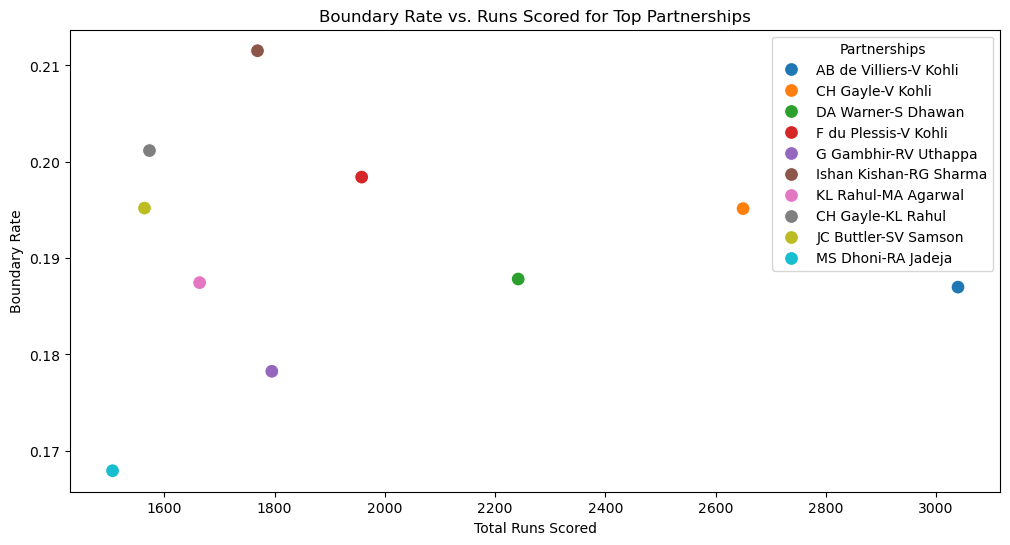

In [71]:
# Count boundaries (fours and sixes) for each pair
data['is_boundary'] = data['batsman_runs'].apply(lambda x: 1 if x in [4, 6] else 0)
# Aggregate boundary rate per partnership
boundary_rates = data.groupby('batting_pair')['is_boundary'].sum() / data.groupby('batting_pair')['batsman_runs'].count()
boundary_rates = boundary_rates.reset_index(name='boundary_rate')

# Merge with partnership runs dataset
partnership_stats = partnership_runs.merge(boundary_rates, on='batting_pair')

# Plot boundary rate vs. runs scored
plt.figure(figsize=(12, 6))
sns.scatterplot(data=partnership_stats, x='batsman_runs', y='boundary_rate', hue='batting_pair', palette='tab10', s=100)
plt.xlabel("Total Runs Scored")
plt.ylabel("Boundary Rate")
plt.title("Boundary Rate vs. Runs Scored for Top Partnerships")
plt.legend(title="Partnerships", bbox_to_anchor=(1, 1))
plt.show()